In [442]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import itertools
nltk.download('vader_lexicon')


from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [443]:
data = pd.read_csv("/content/feedback.csv")
data

,Unnamed: 0,Compliment
0,NaN,Compliment
1,NaN,Compliment
2,NaN,Compliment
3,NaN,Compliment
4,NaN,Compliment
...,...,...
2960,As feedback I thought the thee sessions were t...,Compliment
2961,Can I also say in general that I have found th...,Compliment
2962,As I said on the call earlier – you have reall...,Compliment
2963,Your guidelines do not appear to indicate whet...,Grumble


In [444]:
df = data.rename(columns={'Unnamed: 0': 'feedback', 'Compliment': 'feedtype'}).dropna()
df

,feedback,feedtype
13,It was easy but I think the Form can be improv...,Neutral
18,Shorten registration times. It's automatic ove...,Grumble
20,BECAUSE A LOT OF THE INFORMATION BEING REQUEST...,Grumble
21,Why does it take 10 days to approve a registra...,Neutral
22,The website is easy to use however the turnaro...,Neutral
...,...,...
2960,As feedback I thought the thee sessions were t...,Compliment
2961,Can I also say in general that I have found th...,Compliment
2962,As I said on the call earlier – you have reall...,Compliment
2963,Your guidelines do not appear to indicate whet...,Grumble


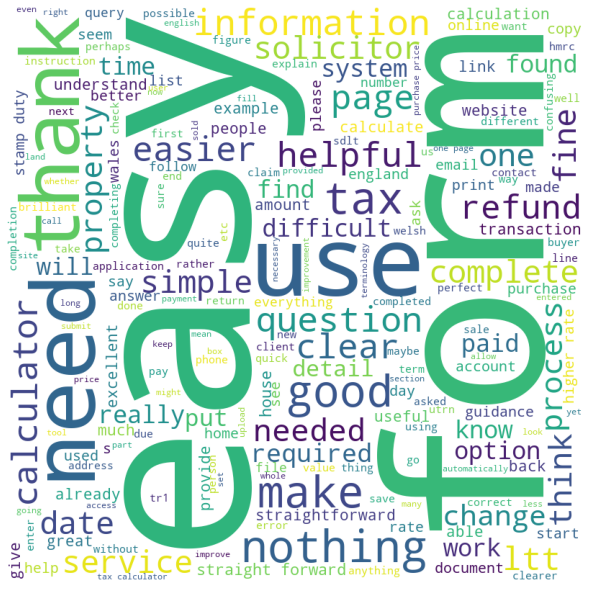

In [445]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.feedback:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [446]:
import string
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['feedback']= df['feedback'].apply(lambda x:remove_punctuation(x))
df.head()

,feedback,feedtype
13,It was easy but I think the Form can be improv...,Neutral
18,Shorten registration times Its automatic over ...,Grumble
20,BECAUSE A LOT OF THE INFORMATION BEING REQUEST...,Grumble
21,Why does it take 10 days to approve a registra...,Neutral
22,The website is easy to use however the turnaro...,Neutral


In [447]:
df['feeback'] = df['feedback'].str.lower()

In [448]:
import re

In [449]:
def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [450]:
from bs4 import BeautifulSoup
from html import unescape

def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [451]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [452]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    return cleaned_string 

In [453]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

In [454]:
import swifter

df['feeback'] = df['feeback'].swifter.apply(remove_urls)
df['feeback'] = df['feeback'].swifter.apply(unescape_stuff)
df['feeback'] = df['feeback'].swifter.apply(deEmojify)
df['feeback'] = df['feeback'].swifter.apply(remove_symbols)
df['feeback'] = df['feeback'].swifter.apply(unify_whitespaces)

Pandas Apply:   0%|          | 0/1512 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1512 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1512 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1512 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1512 [00:00<?, ?it/s]

In [455]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sp = spacy.load('en_core_web_sm')

StopWords = sp.Defaults.stop_words
StopWords = [x.lower() for x in StopWords]
StopWords.extend(list(stopwords.words('english')))
StopWords = list(set(StopWords))

def remove_stopwords(x):
    
    words = []
    my_list = x
    
    tokenized_my_list = word_tokenize(my_list) 
    words = [w for w in tokenized_my_list if not w in StopWords]
        
    return " ".join(words)

In [456]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [457]:
df['feeback'] = df['feeback'].apply(lambda x:remove_stopwords(x))

In [458]:
df

,feedback,feedtype,feeback
13,It was easy but I think the Form can be improv...,Neutral,easy think form improved adding tick box buyer...
18,Shorten registration times Its automatic over ...,Grumble,shorten registration times automatic bridge
20,BECAUSE A LOT OF THE INFORMATION BEING REQUEST...,Grumble,lot information requested repetitive
21,Why does it take 10 days to approve a registra...,Neutral,10 days approve registration
22,The website is easy to use however the turnaro...,Neutral,website easy use turnaround time long
...,...,...,...
2960,As feedback I thought the thee sessions were t...,Compliment,feedback thought thee sessions right length in...
2961,Can I also say in general that I have found th...,Compliment,general found wra helpful dealing technical qu...
2962,As I said on the call earlier – you have reall...,Compliment,said earlier helpful patient pass feedback lin...
2963,Your guidelines do not appear to indicate whet...,Grumble,guidelines appear indicate 40000 exemption app...


In [459]:
def tokenization(text):
  tokens = re.findall("[\w]+",text)
  return tokens
#apply tokens
df['clean_feedback'] = df['feeback'].apply(lambda x:tokenization(x))

In [460]:
df['clean_feedback']

13      [easy, think, form, improved, adding, tick, bo...
18      [shorten, registration, times, automatic, bridge]
20              [lot, information, requested, repetitive]
21                      [10, days, approve, registration]
22           [website, easy, use, turnaround, time, long]
                              ...                        
2960    [feedback, thought, thee, sessions, right, len...
2961    [general, found, wra, helpful, dealing, techni...
2962    [said, earlier, helpful, patient, pass, feedba...
2963    [guidelines, appear, indicate, 40000, exemptio...
2964                            [hope, says, great, miss]
Name: clean_feedback, Length: 1512, dtype: object

In [461]:
compliment_reviews =df[df['feedtype']=='Compliment']['clean_feedback']
compliment_reviews_words = list(itertools.chain(*compliment_reviews))

neutral_reviews =df[df['feedtype']=='Neutral']['clean_feedback']
neutral_reviews_words = list(itertools.chain(*neutral_reviews))

grumble_reviews =df[df['feedtype']=='Grumble']['clean_feedback']
grumble_reviews_words = list(itertools.chain(*grumble_reviews))

In [462]:
from nltk import collections
compliment_word_freq = collections.Counter(compliment_reviews_words)
neutral_word_freq = collections.Counter(neutral_reviews_words)
grumble_word_freq = collections.Counter(grumble_reviews_words)

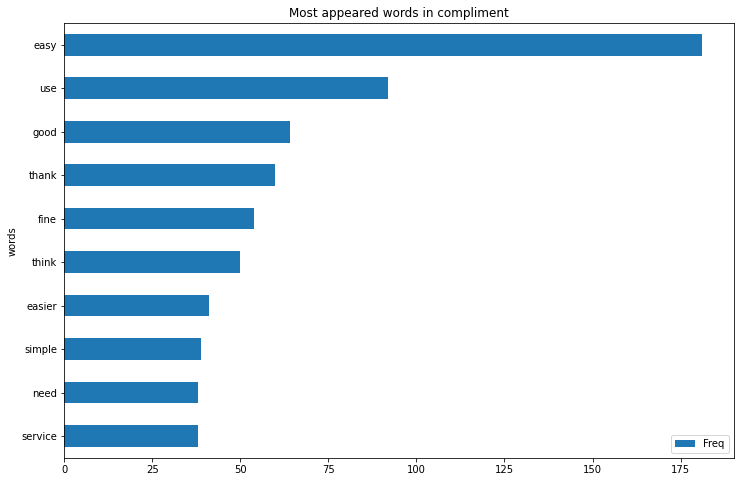

In [463]:
compliment_word_freq_df = pd.DataFrame(compliment_word_freq.most_common(10), columns = ['words','Freq'])
fig , ax = plt.subplots(figsize = (12,8))
compliment_word_freq_df.sort_values(by='Freq').plot.barh(x="words",y="Freq", ax=ax,)
plt.title("Most appeared words in compliment")
plt.show()

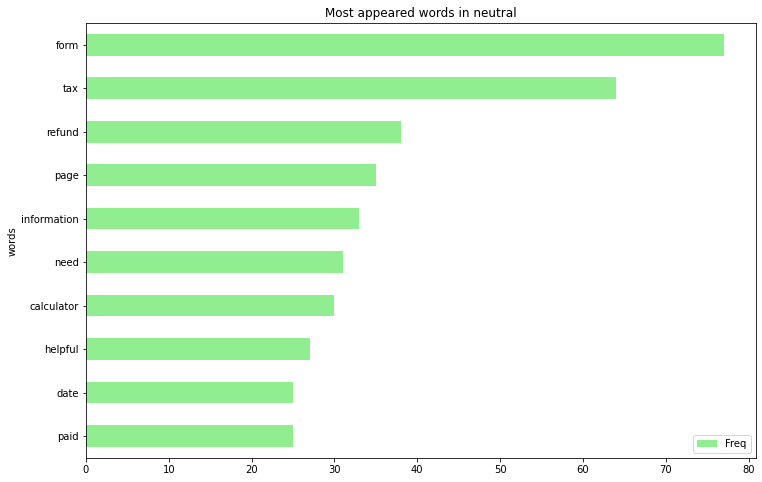

In [464]:
neutral_word_freq_df = pd.DataFrame(neutral_word_freq.most_common(10), columns = ['words','Freq'])
fig , ax = plt.subplots(figsize = (12,8))
neutral_word_freq_df.sort_values(by='Freq').plot.barh(x="words",y="Freq", ax=ax , color = 'lightgreen')
plt.title("Most appeared words in neutral")
plt.show()

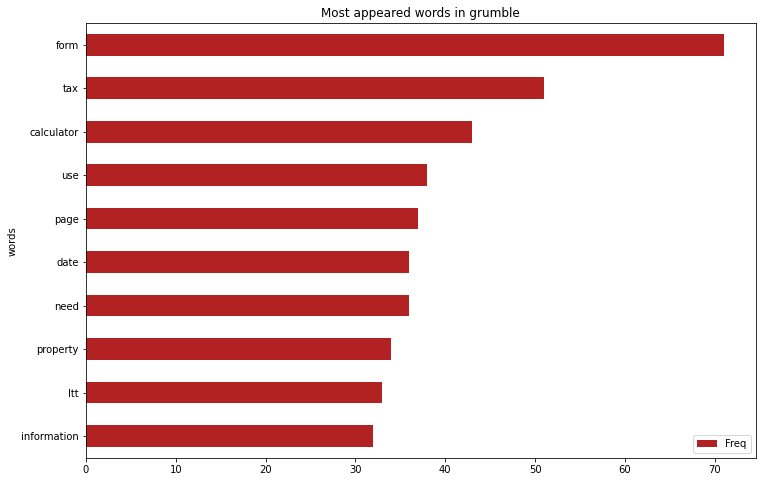

In [465]:
grumble_word_freq_df = pd.DataFrame(grumble_word_freq.most_common(10), columns = ['words','Freq'])
fig , ax = plt.subplots(figsize = (12,8))
grumble_word_freq_df.sort_values(by='Freq').plot.barh(x="words",y="Freq", ax=ax, color = 'Firebrick')
plt.title("Most appeared words in grumble")
plt.show()

In [466]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('-'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [467]:
df["bigram_text"] = df["feeback"].swifter.apply(get_ngrams, n=2)

Pandas Apply:   0%|          | 0/1512 [00:00<?, ?it/s]

In [468]:
df

,feedback,feedtype,feeback,clean_feedback,bigram_text
13,It was easy but I think the Form can be improv...,Neutral,easy think form improved adding tick box buyer...,"[easy, think, form, improved, adding, tick, bo...",easy-think think-form form-improved improved-a...
18,Shorten registration times Its automatic over ...,Grumble,shorten registration times automatic bridge,"[shorten, registration, times, automatic, bridge]",shorten-registration registration-times times-...
20,BECAUSE A LOT OF THE INFORMATION BEING REQUEST...,Grumble,lot information requested repetitive,"[lot, information, requested, repetitive]",lot-information information-requested requeste...
21,Why does it take 10 days to approve a registra...,Neutral,10 days approve registration,"[10, days, approve, registration]",10-days days-approve approve-registration
22,The website is easy to use however the turnaro...,Neutral,website easy use turnaround time long,"[website, easy, use, turnaround, time, long]",website-easy easy-use use-turnaround turnaroun...
...,...,...,...,...,...
2960,As feedback I thought the thee sessions were t...,Compliment,feedback thought thee sessions right length in...,"[feedback, thought, thee, sessions, right, len...",feedback-thought thought-thee thee-sessions se...
2961,Can I also say in general that I have found th...,Compliment,general found wra helpful dealing technical qu...,"[general, found, wra, helpful, dealing, techni...",general-found found-wra wra-helpful helpful-de...
2962,As I said on the call earlier – you have reall...,Compliment,said earlier helpful patient pass feedback lin...,"[said, earlier, helpful, patient, pass, feedba...",said-earlier earlier-helpful helpful-patient p...
2963,Your guidelines do not appear to indicate whet...,Grumble,guidelines appear indicate 40000 exemption app...,"[guidelines, appear, indicate, 40000, exemptio...",guidelines-appear appear-indicate indicate-400...


In [469]:
new_df["bigram_text"]

13      easy-think think-form form-improved improved-a...
18      shorten-registration registration-times times-...
20      lot-information information-requested requeste...
21              10-days days-approve approve-registration
22      website-easy easy-use use-turnaround turnaroun...
                              ...                        
2960    feedback-thought thought-thee thee-sessions se...
2961    general-found found-wra wra-helpful helpful-de...
2962    said-earlier earlier-helpful helpful-patient p...
2963    guidelines-appear appear-indicate indicate-400...
2964                      hope-says says-great great-miss
Name: bigram_text, Length: 1512, dtype: object

In [470]:
df["trigram_text"] = df["feeback"].swifter.apply(get_ngrams, n=3)

Pandas Apply:   0%|          | 0/1512 [00:00<?, ?it/s]

In [471]:
df['trigram_text']

13      easy-think-form think-form-improved form-impro...
18      shorten-registration-times registration-times-...
20      lot-information-requested information-requeste...
21              10-days-approve days-approve-registration
22      website-easy-use easy-use-turnaround use-turna...
                              ...                        
2960    feedback-thought-thee thought-thee-sessions th...
2961    general-found-wra found-wra-helpful wra-helpfu...
2962    said-earlier-helpful earlier-helpful-patient h...
2963    guidelines-appear-indicate appear-indicate-400...
2964                      hope-says-great says-great-miss
Name: trigram_text, Length: 1512, dtype: object

In [472]:
bigram_str_list = df['bigram_text'].tolist()
bigram_str = ' '.join(bigram_str_list)

In [473]:
 word_cloud1 = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, 
                      collocations=False, normalize_plurals=False).generate(bigram_str) 

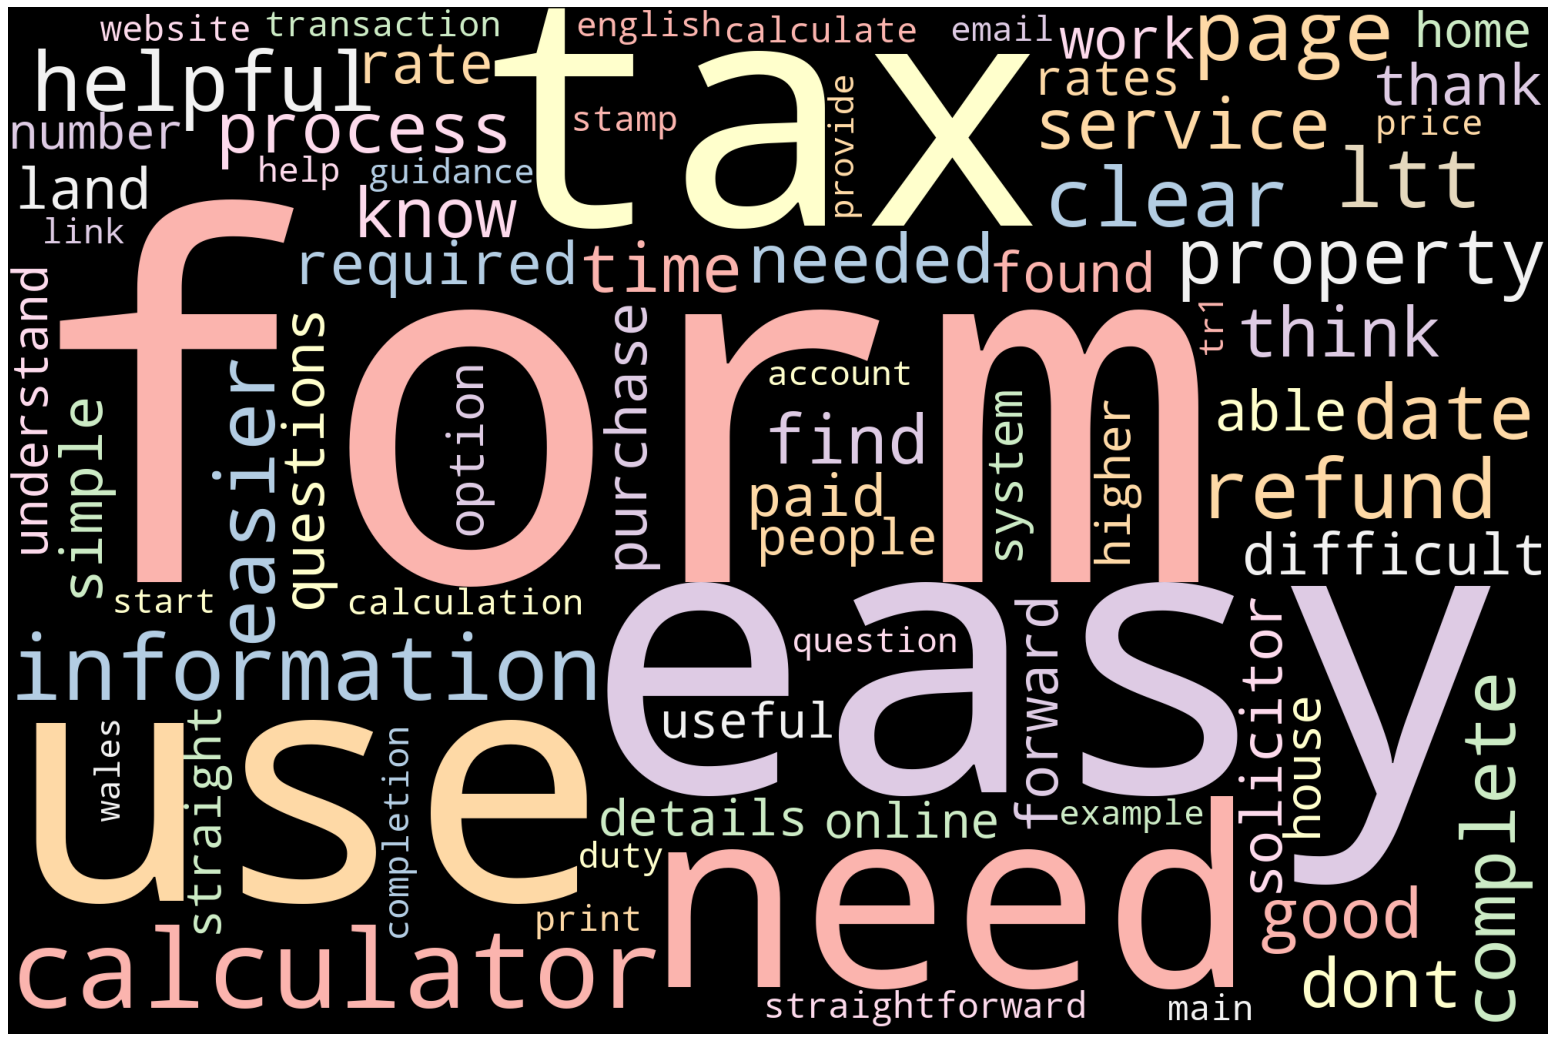

In [474]:
from matplotlib.pyplot import figure
def plot_cloud(word_cloud1):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(word_cloud1)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   
plot_cloud(word_cloud1)

In [475]:
trigram_str_list = df['trigram_text'].tolist()
trigram_str = ' '.join(trigram_str_list)

In [476]:
word_cloud2 = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, 
                      collocations=False, normalize_plurals=False).generate(trigram_str) 

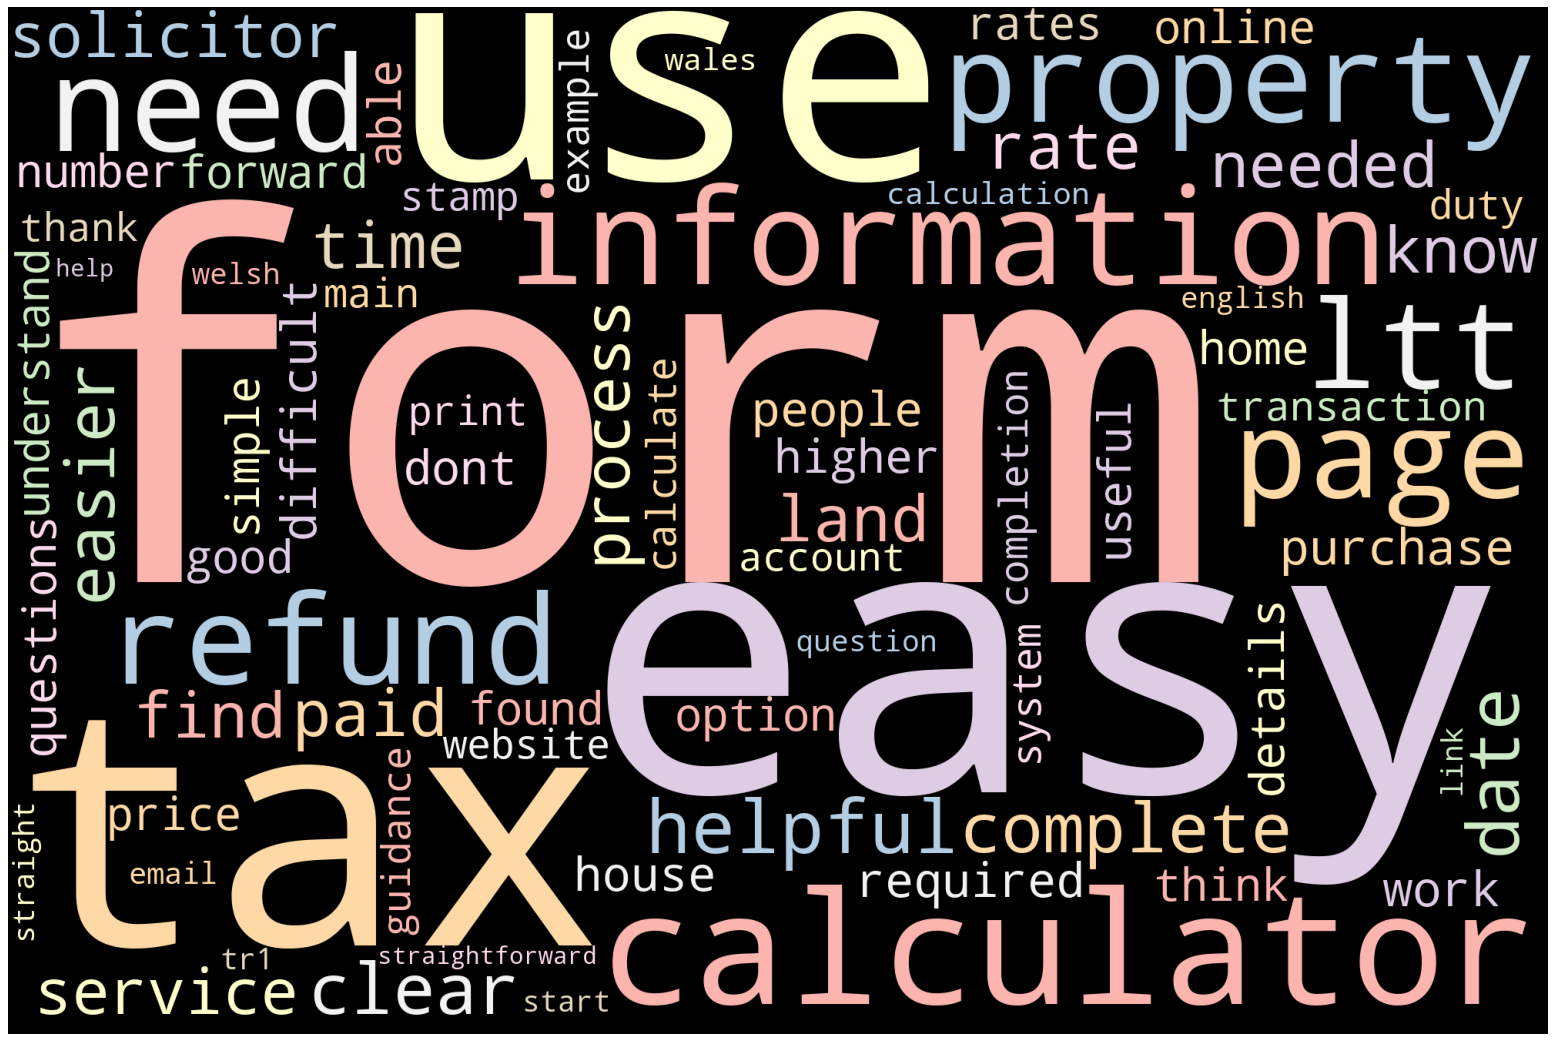

In [477]:
plot_cloud(word_cloud2)

In [478]:
df

,feedback,feedtype,feeback,clean_feedback,bigram_text,trigram_text
13,It was easy but I think the Form can be improv...,Neutral,easy think form improved adding tick box buyer...,"[easy, think, form, improved, adding, tick, bo...",easy-think think-form form-improved improved-a...,easy-think-form think-form-improved form-impro...
18,Shorten registration times Its automatic over ...,Grumble,shorten registration times automatic bridge,"[shorten, registration, times, automatic, bridge]",shorten-registration registration-times times-...,shorten-registration-times registration-times-...
20,BECAUSE A LOT OF THE INFORMATION BEING REQUEST...,Grumble,lot information requested repetitive,"[lot, information, requested, repetitive]",lot-information information-requested requeste...,lot-information-requested information-requeste...
21,Why does it take 10 days to approve a registra...,Neutral,10 days approve registration,"[10, days, approve, registration]",10-days days-approve approve-registration,10-days-approve days-approve-registration
22,The website is easy to use however the turnaro...,Neutral,website easy use turnaround time long,"[website, easy, use, turnaround, time, long]",website-easy easy-use use-turnaround turnaroun...,website-easy-use easy-use-turnaround use-turna...
...,...,...,...,...,...,...
2960,As feedback I thought the thee sessions were t...,Compliment,feedback thought thee sessions right length in...,"[feedback, thought, thee, sessions, right, len...",feedback-thought thought-thee thee-sessions se...,feedback-thought-thee thought-thee-sessions th...
2961,Can I also say in general that I have found th...,Compliment,general found wra helpful dealing technical qu...,"[general, found, wra, helpful, dealing, techni...",general-found found-wra wra-helpful helpful-de...,general-found-wra found-wra-helpful wra-helpfu...
2962,As I said on the call earlier – you have reall...,Compliment,said earlier helpful patient pass feedback lin...,"[said, earlier, helpful, patient, pass, feedba...",said-earlier earlier-helpful helpful-patient p...,said-earlier-helpful earlier-helpful-patient h...
2963,Your guidelines do not appear to indicate whet...,Grumble,guidelines appear indicate 40000 exemption app...,"[guidelines, appear, indicate, 40000, exemptio...",guidelines-appear appear-indicate indicate-400...,guidelines-appear-indicate appear-indicate-400...


In [479]:
new_df = df[['bigram_text','trigram_text']].copy()

In [480]:
df = df.drop(['bigram_text','trigram_text'], axis=1)

In [481]:
df

,feedback,feedtype,feeback,clean_feedback
13,It was easy but I think the Form can be improv...,Neutral,easy think form improved adding tick box buyer...,"[easy, think, form, improved, adding, tick, bo..."
18,Shorten registration times Its automatic over ...,Grumble,shorten registration times automatic bridge,"[shorten, registration, times, automatic, bridge]"
20,BECAUSE A LOT OF THE INFORMATION BEING REQUEST...,Grumble,lot information requested repetitive,"[lot, information, requested, repetitive]"
21,Why does it take 10 days to approve a registra...,Neutral,10 days approve registration,"[10, days, approve, registration]"
22,The website is easy to use however the turnaro...,Neutral,website easy use turnaround time long,"[website, easy, use, turnaround, time, long]"
...,...,...,...,...
2960,As feedback I thought the thee sessions were t...,Compliment,feedback thought thee sessions right length in...,"[feedback, thought, thee, sessions, right, len..."
2961,Can I also say in general that I have found th...,Compliment,general found wra helpful dealing technical qu...,"[general, found, wra, helpful, dealing, techni..."
2962,As I said on the call earlier – you have reall...,Compliment,said earlier helpful patient pass feedback lin...,"[said, earlier, helpful, patient, pass, feedba..."
2963,Your guidelines do not appear to indicate whet...,Grumble,guidelines appear indicate 40000 exemption app...,"[guidelines, appear, indicate, 40000, exemptio..."


In [482]:
df

,feedback,feedtype,feeback,clean_feedback
13,It was easy but I think the Form can be improv...,Neutral,easy think form improved adding tick box buyer...,"[easy, think, form, improved, adding, tick, bo..."
18,Shorten registration times Its automatic over ...,Grumble,shorten registration times automatic bridge,"[shorten, registration, times, automatic, bridge]"
20,BECAUSE A LOT OF THE INFORMATION BEING REQUEST...,Grumble,lot information requested repetitive,"[lot, information, requested, repetitive]"
21,Why does it take 10 days to approve a registra...,Neutral,10 days approve registration,"[10, days, approve, registration]"
22,The website is easy to use however the turnaro...,Neutral,website easy use turnaround time long,"[website, easy, use, turnaround, time, long]"
...,...,...,...,...
2960,As feedback I thought the thee sessions were t...,Compliment,feedback thought thee sessions right length in...,"[feedback, thought, thee, sessions, right, len..."
2961,Can I also say in general that I have found th...,Compliment,general found wra helpful dealing technical qu...,"[general, found, wra, helpful, dealing, techni..."
2962,As I said on the call earlier – you have reall...,Compliment,said earlier helpful patient pass feedback lin...,"[said, earlier, helpful, patient, pass, feedba..."
2963,Your guidelines do not appear to indicate whet...,Grumble,guidelines appear indicate 40000 exemption app...,"[guidelines, appear, indicate, 40000, exemptio..."


In [483]:
df['feedtype'] = df['feedtype'].str.lower()

Text(0, 0.5, '')

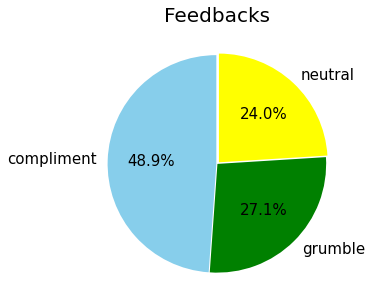

In [484]:
feed_df = df["feedtype"]
plt.figure(figsize=(5,5))
feed_df.value_counts().plot(kind="pie", autopct="%1.1f%%", textprops={"fontsize": 15}, startangle=90, explode=(0.01, 0,0.02), colors=["skyblue","green","yellow"])
plt.title("Feedbacks", fontsize=20)
plt.ylabel("")

In [485]:
df['feedtype'] = df['feedtype'].replace(['compliment','grumble','neutral'],[1,0,2])

In [486]:
X_train, X_test, y_train, y_test = train_test_split(df['feeback'],df['feedtype'] , test_size=0.1, random_state=0)

In [487]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
        #stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [488]:
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 explanatory notes helpful eg clear utrn specific transaction example self assessment utrn


In [489]:
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 2163 

Show some feature names : 
 ['aberystwyth', 'integrate', 'type']


MultinomialNB()

In [490]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [491]:
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8026

Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74        45
           1       0.96      0.93      0.95        76
           2       0.51      0.61      0.56        31

    accuracy                           0.80       152
   macro avg       0.75      0.75      0.75       152
weighted avg       0.82      0.80      0.81       152


Confusion Matrix : 
 [[32  0 13]
 [ 0 71  5]
 [ 9  3 19]]


In [492]:
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 416 

Show some feature names : 
 ['10']


LogisticRegression()

In [493]:
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['easy' 'good' 'straightforward' 'fine' 'useful' 'think' 'excellent'
 'brilliant' 'perfect' 'ok']

Top 10 features with largest coefficients : 
['update' 'date' 'work' 'working' 'terms' 'access' 'wrong' 'english'
 'complicated' 'confusing']


In [494]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.7632

Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.67      0.67        45
           1       0.86      0.92      0.89        76
           2       0.59      0.52      0.55        31

    accuracy                           0.76       152
   macro avg       0.71      0.70      0.71       152
weighted avg       0.75      0.76      0.76       152


Confusion Matrix : 
 [[30  6  9]
 [ 4 70  2]
 [10  5 16]]


In [435]:
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "tfidf__min_df": [1, 3], #min count of words 
          "tfidf__max_features": [1000, None], #max features
          "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "tfidf__stop_words": [None, "english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.7763

Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.71      0.70        45
           1       0.92      0.91      0.91        76
           2       0.55      0.55      0.55        31

    accuracy                           0.78       152
   macro avg       0.72      0.72      0.72       152
weighted avg       0.78      0.78      0.78       152


Confusion Matrix : 
 [[32  2 11]
 [ 4 69  3]
 [10  4 17]]
